# <font color = 'green'> Getting started
https://scikit-learn.org/stable/getting_started.html

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import warnings
warnings.filterwarnings(action='ignore')

# X는 반드시 Matrix(행렬)이어야 함

In [2]:
from sklearn.ensemble import RandomForestClassifier

In [3]:
clf = RandomForestClassifier()

In [4]:
X = [[1,2,3], [11,12,13]]
X

[[1, 2, 3], [11, 12, 13]]

In [5]:
X = ((1,2,3), (11,12,13))
X

((1, 2, 3), (11, 12, 13))

In [6]:
import numpy as np
X = np.array(X)
print(X)
X.shape

[[ 1  2  3]
 [11 12 13]]


(2, 3)

In [7]:
import pandas as pd
X = pd.DataFrame(X)
X

,0,1,2
0,1,2,3
1,11,12,13


In [8]:
y=[0,1]

In [9]:
clf.fit(X,y)

RandomForestClassifier()

In [10]:
clf.predict(X)

array([0, 1])

In [11]:
clf.predict([4,5,6])

ValueError: ignored

In [12]:
clf.predict([[4,5,6]])

array([0])

In [13]:
clf.predict(np.array([4,5,6]).reshape(1,-1))

array([0])

In [14]:
np.array([4,5,6]).reshape(1,-1).shape

(1, 3)

## Data Obtain

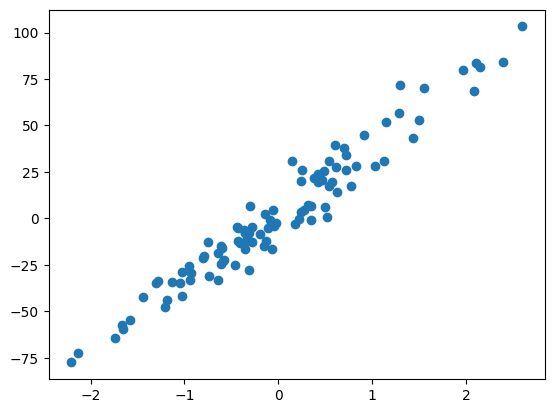

In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
X, y = make_regression(n_features=1, noise=10, random_state=111)
import matplotlib.pyplot as plt
plt.scatter(X, y)

(array([ 4.,  6., 13., 23., 20., 17.,  6.,  3.,  7.,  1.]),
 array([-77.54570578, -59.46295537, -41.38020495, -23.29745454,
         -5.21470413,  12.86804628,  30.9507967 ,  49.03354711,
         67.11629752,  85.19904793, 103.28179835]),
 <BarContainer object of 10 artists>)

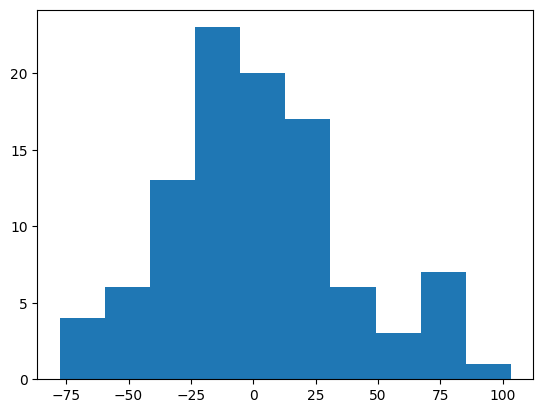

In [16]:
plt.hist(y)

In [17]:
y.mean()

1.65825353732792

In [18]:
bottom = y.mean() - 1.2*y.std()
ceiling = y.mean() + 1.2*y.std()

(array([ 4.,  6., 13., 23., 20., 17.,  6.,  3.,  7.,  1.]),
 array([-77.54570578, -59.46295537, -41.38020495, -23.29745454,
         -5.21470413,  12.86804628,  30.9507967 ,  49.03354711,
         67.11629752,  85.19904793, 103.28179835]),
 <BarContainer object of 10 artists>)

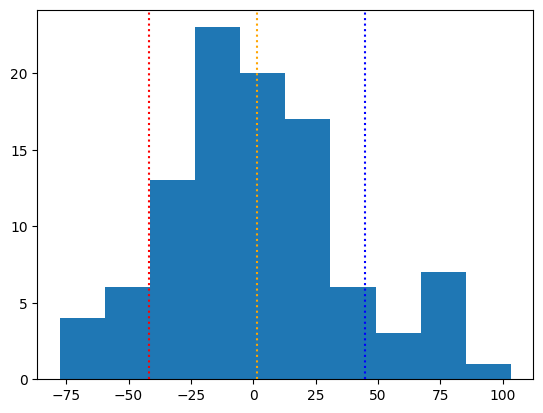

In [19]:
plt.hist(y)
plt.axvline(y.mean(), 0, 15, color='orange', linestyle='dotted')
plt.axvline(bottom, 0, 15, color='red', linestyle='dotted')
plt.axvline(ceiling, 0, 15, color='blue', linestyle='dotted')

In [20]:
regr_rf = RandomForestRegressor()
regr_rf.fit(X, y)
regr_rf.predict([[0]])

RandomForestRegressor()

array([-2.15269158])

In [21]:
y_predict_rf = regr_rf.predict(X)

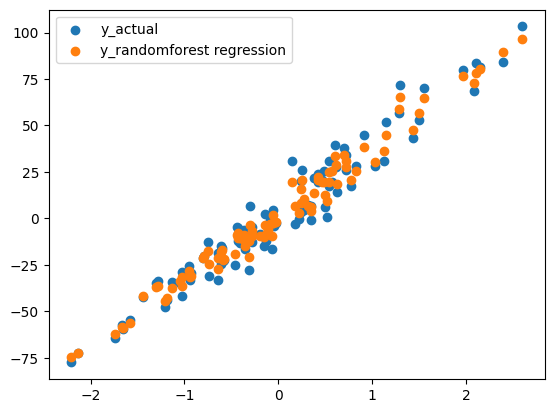

In [22]:
plt.scatter(X, y, label='y_actual')
plt.scatter(X, y_predict_rf, label='y_randomforest regression')
plt.legend()

In [23]:
from sklearn.linear_model import LinearRegression
regr_lr = LinearRegression().fit(X, y)
y_predict_lr = regr_lr.predict(X)
regr_lr.predict([[0]])

array([2.08555217])

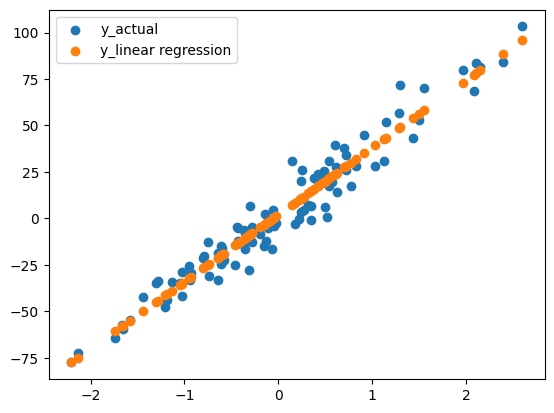

In [24]:
plt.scatter(X, y, label='y_actual')
plt.scatter(X, y_predict_lr, label='y_linear regression')
plt.legend()

In [25]:
from sklearn.metrics import mean_absolute_error
print('MAE_rf',mean_absolute_error(y, y_predict_rf))
print('MAE_lr',mean_absolute_error(y, y_predict_lr))

MAE_rf 3.4474001102837657
MAE_lr 6.864340099043651


In [26]:
from sklearn.metrics import mean_squared_error
print('MSE_rf',mean_squared_error(y, y_predict_rf))
print('MSE_lr',mean_squared_error(y, y_predict_lr))

MSE_rf 17.76110039604841
MSE_lr 71.6356778212634


In [27]:
import numpy
x = numpy.linspace(X.min(), X.max(), 60)
y_predict_rf = regr_rf.predict(x.reshape(-1,1))
y_predict_lr = regr_lr.predict(x.reshape(-1,1))

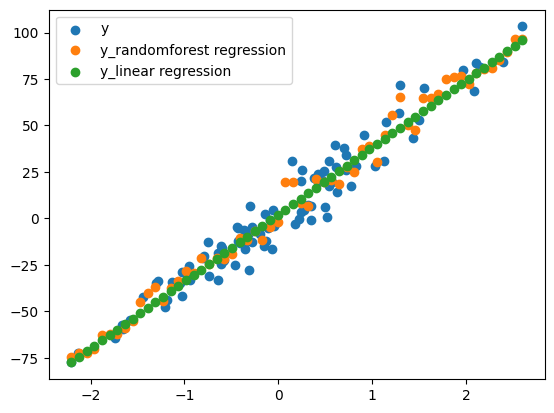

In [28]:
plt.scatter(X, y, label='y')
plt.scatter(x, y_predict_rf, label='y_randomforest regression')
plt.scatter(x, y_predict_lr, label='y_linear regression')
plt.legend()

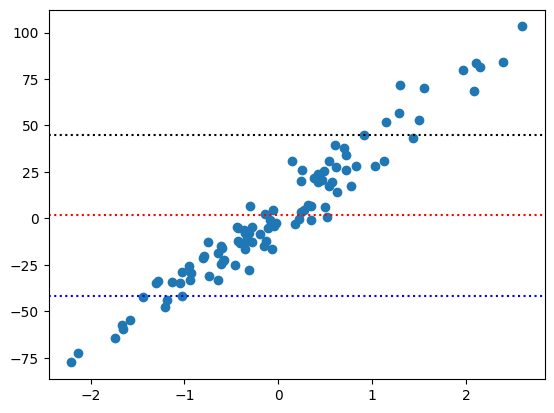

In [29]:
plt.scatter(X, y, label='y')
plt.axhline(y.mean(), -2, 2, color='red', linestyle='dotted')
plt.axhline(ceiling, -2, 2, color='black', linestyle='dotted')
plt.axhline(bottom, -2, 2, color='blue', linestyle='dotted')

In [30]:
print(f'선형회귀 모형의 결정계수(coefficient of determination) : {regr_lr.score(X, y)}')
print(f'회귀분석 선형식의 절편 : {regr_lr.coef_}, 기울기는 {regr_lr.intercept_}')

선형회귀 모형의 결정계수(coefficient of determination) : 0.944960420963386
회귀분석 선형식의 절편 : [36.09362947], 기울기는 2.0855521670947867


In [31]:
print(f'랜덤포레스트 모형의 결정계수(coefficient of determination) : {regr_rf.score(X, y)}')

랜덤포레스트 모형의 결정계수(coefficient of determination) : 0.9863536785194573


## Iris 데이터, 랜덤포레스트 분류 예측

In [32]:
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True)

In [33]:
X[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [34]:
y[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [35]:
# 데이터 예측하려면
new_instance = [[2,4,1,2]]

In [36]:
clf

RandomForestClassifier()

In [37]:
clf = RandomForestClassifier(max_depth = 20)

In [38]:
clf.fit(X, y)

RandomForestClassifier(max_depth=20)

In [39]:
clf.predict(new_instance)

array([0])

In [40]:
y_pred = clf.predict(X)
np.isclose(y_pred, y)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [41]:
from sklearn.metrics import accuracy_score
accuracy_score(y, y_pred)

1.0

## 정확도가 100%인 이유는?
### 훈련과 검증데이터 (Hold out dtaset)
<img src='https://scikit-learn.org/stable/_images/grid_search_cross_validation.png' width = 600 height=400>

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X_train.shape
X_test.shape

(112, 4)

(38, 4)

In [43]:
clf.fit(X_train,y_train)

RandomForestClassifier(max_depth=20)

In [44]:
clf.predict(X_test)

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2])

In [45]:
y_test

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1])

In [46]:
accuracy_score(clf.predict(X_test), y_test)

0.9736842105263158

In [47]:
np.isclose(clf.predict(X_test), y_test)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False])

In [48]:
1 - 1/len(y_test)

0.9736842105263158

In [49]:
clf.predict(X_test)

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2])

In [50]:
accuracy_score(clf.predict(X_test), y_test)

0.9736842105263158

# <font color='purple'> 하이퍼파라미터튜닝과 교차검증(hyperparameter tuning with cross validation)
## 알고리즘별로 hyperparameter가 별도로 존재
### 교차검증을 통해 평균적으로 가장 높은 예측 성능지표(예: 정확도)를 갖는 모델을 찾는 것이 목적
- K-nearnest neighbors algoritm (classification)

# End